# Google Data Analytics Capstone Project
### By: Mohamed G. El-Naggar | Dated: 31-12-2022

## Breif Background on the project:
As a junior data analyst working in the marketing analyst team at Cyclistic(a bike-share company in Chicago). The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members.

## Stakeholders:
* Lily Moreno: The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analysing, and reporting data that helps guide Cyclistic marketing strategy.
* Cyclistic executive team: The executive team will decide whether to approve the recommended marketing program.

## Business Task:
1. Determine the patterns associated with service offered by Cyclistic.
2. Analyse the target audience and clients for our new campagin.
3. Enhance current offered services.

## Datasource:
The data used was offered under license of this link [link](https://ride.divvybikes.com/data-license-agreement). 
We used the last 11 months data in order to create the patterns associated with our services.
### Data:
The data is sorted under same order for each file and contains the same 12 columns:
1. ride_id (a specific id for each ride).
2. rideable_type (type of bike used).  
3. started_at (time/date of starting journey).        
4. ended_at (time/date of ending journey).             
5. start_station_name (start station name).
6. start_station_id (start station internal id).
7. end_station_name (end station name).     
8. end_station_id (end station internal id).      
9. start_lat (start location latitude).         
10. start_lng (start location longitude).             
11. end_lat (end location latitude).               
12. end_lng (end location longitude).               
13. member_casual (member type).

From having the primary insight on the data provided over spreadsheet program, it seems that data is reliable and will give an output that will be helpful for decision making. But, this will be reached after cleaning process into a sortable and understandable way in order to get the new inputs that will help in our analysis.

## Processing the data:

We'll use Python to do our manipulation and analysis.

First of all, well import the libraries we'll need originally in our analysis.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

Importing the last 11 months in dataframes:

In [7]:
nov=pd.read_csv('202211-divvy-tripdata.csv')
octb=pd.read_csv('202210-divvy-tripdata.csv')
sep=pd.read_csv('202209-divvy-tripdata.csv')
aug=pd.read_csv('202208-divvy-tripdata.csv')
jul=pd.read_csv('202207-divvy-tripdata.csv')
jun=pd.read_csv('202206-divvy-tripdata.csv')
may=pd.read_csv('202205-divvy-tripdata.csv')
apr=pd.read_csv('202204-divvy-tripdata.csv')
mar=pd.read_csv('202203-divvy-tripdata.csv')
feb=pd.read_csv('202202-divvy-tripdata.csv')
jan=pd.read_csv('202201-divvy-tripdata.csv')

Merging the dataframes of the last 11 months in one dataframe to apply all the cleaning steps:

In [8]:
merger=pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,octb,nov])
merger.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member


In [9]:
merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485911 entries, 0 to 337734
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 586.0+ MB


Determining the unique values in our dataframe:

In [10]:
merger.nunique()

ride_id               5485911
rideable_type               3
started_at            4575538
ended_at              4588116
start_station_name       1661
start_station_id         1311
end_station_name         1680
end_station_id           1316
start_lat              648758
start_lng              613005
end_lat                  1588
end_lng                  1572
member_casual               2
dtype: int64

Create date and time for both start and end time data we already have in our dateframe:

In [11]:
merger['startdate']=pd.to_datetime(merger['started_at']).dt.date
merger['starttime']=pd.to_datetime(merger['started_at']).dt.time
merger['enddate']=pd.to_datetime(merger['ended_at']).dt.date
merger['endtime']=pd.to_datetime(merger['ended_at']).dt.time
merger.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime
0,C2F7DD78E82EC875,electric_bike,2022-01-13 11:59:47,2022-01-13 12:02:44,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,11:59:47,2022-01-13,12:02:44
1,A6CF8980A652D272,electric_bike,2022-01-10 08:41:56,2022-01-10 08:46:17,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,08:41:56,2022-01-10,08:46:17
2,BD0F91DFF741C66D,classic_bike,2022-01-25 04:53:40,2022-01-25 04:58:01,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,04:53:40,2022-01-25,04:58:01
3,CBB80ED419105406,classic_bike,2022-01-04 00:18:04,2022-01-04 00:33:00,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,00:18:04,2022-01-04,00:33:00
4,DDC963BFDDA51EEA,classic_bike,2022-01-20 01:31:10,2022-01-20 01:37:12,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,01:31:10,2022-01-20,01:37:12


In [12]:
merger.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5485911 entries, 0 to 337734
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
 13  startdate           object 
 14  starttime           object 
 15  enddate             object 
 16  endtime             object 
dtypes: float64(4), object(13)
memory usage: 753.4+ MB


In [13]:
#Convert start and end dates to datetime class
merger['startdate']=pd.to_datetime(merger['startdate'])
merger['enddate']=pd.to_datetime(merger['enddate'])

Importing another Python library which appears to be useful to extract data from given start and end dates:

In [14]:
import calendar
from datetime import datetime

In [15]:
#Create weekday correspondent to each start and end dates
merger['startday']=merger[['startdate']].apply(lambda x: datetime.strftime(x['startdate'], '%A'), axis=1)
merger['endday']=merger[['enddate']].apply(lambda x: datetime.strftime(x['enddate'], '%A'), axis=1)

In [16]:
#Cleaning process to eliminate non-used columns
merger.drop(merger.columns[2:4],axis=1,inplace=True)
merger.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime,startday,endday
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,11:59:47,2022-01-13,12:02:44,Thursday,Thursday
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,08:41:56,2022-01-10,08:46:17,Monday,Monday
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,04:53:40,2022-01-25,04:58:01,Tuesday,Tuesday
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,00:18:04,2022-01-04,00:33:00,Tuesday,Tuesday
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,01:31:10,2022-01-20,01:37:12,Thursday,Thursday


In [17]:
from datetime import timedelta

In [18]:
#Convert start and end times to string and timedelta to get duration of each ride
merger['starttime']= (merger['starttime'].astype('string').apply(pd.Timedelta))

In [19]:
merger['endtime']= (merger['endtime'].astype('string').apply(pd.Timedelta))

In [20]:
#Create a backup dataframe for any downfall in the code
merger2=merger

Cleaning and elimination of non-used columns:

In [21]:
#Create Duration column in minutes
merger['duration']=((merger['endtime']-merger['starttime']).dt.total_seconds())/60
#Eliminate trip which started and ended in other days - one trip as per dataset nunique output
merger.drop(merger.loc[merger['duration']<0].index,inplace=True)
merger.drop(merger.loc[merger['duration']==0].index,inplace=True)
merger.dropna()
merger.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime,startday,endday,duration
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,0 days 11:59:47,2022-01-13,0 days 12:02:44,Thursday,Thursday,2.950000
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,0 days 08:41:56,2022-01-10,0 days 08:46:17,Monday,Monday,4.350000
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,0 days 04:53:40,2022-01-25,0 days 04:58:01,Tuesday,Tuesday,4.350000
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,0 days 00:18:04,2022-01-04,0 days 00:33:00,Tuesday,Tuesday,14.933333
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,0 days 01:31:10,2022-01-20,0 days 01:37:12,Thursday,Thursday,6.033333


In [22]:
merger.dropna(axis=0,how='all')

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime,startday,endday,duration
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,casual,2022-01-13,0 days 11:59:47,2022-01-13,0 days 12:02:44,Thursday,Thursday,2.950000
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,casual,2022-01-10,0 days 08:41:56,2022-01-10,0 days 08:46:17,Monday,Monday,4.350000
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,member,2022-01-25,0 days 04:53:40,2022-01-25,0 days 04:58:01,Tuesday,Tuesday,4.350000
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,casual,2022-01-04,0 days 00:18:04,2022-01-04,0 days 00:33:00,Tuesday,Tuesday,14.933333
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,member,2022-01-20,0 days 01:31:10,2022-01-20,0 days 01:37:12,Thursday,Thursday,6.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337730,C349E243A9BAA6F7,electric_bike,Wabash Ave & Grand Ave,TA1307000117,NaN,NaN,41.891836,-87.626806,41.890000,-87.620000,member,2022-11-25,0 days 11:19:52,2022-11-25,0 days 11:31:50,Friday,Friday,11.966667
337731,B0B4E85DA43A9194,classic_bike,Franklin St & Jackson Blvd,TA1305000025,Sheffield Ave & Wrightwood Ave,TA1309000023,41.877708,-87.635321,41.928712,-87.653833,casual,2022-11-22,0 days 16:57:53,2022-11-22,0 days 17:31:29,Tuesday,Tuesday,33.600000
337732,8D148DD47B59530B,classic_bike,Michigan Ave & Ida B Wells Dr,TA1305000010,Shedd Aquarium,15544,41.876243,-87.624426,41.867226,-87.615355,casual,2022-11-06,0 days 13:04:05,2022-11-06,0 days 13:13:33,Sunday,Sunday,9.466667
337733,0D1170BA18FD33D1,classic_bike,Halsted St & 18th St,13099,Shedd Aquarium,15544,41.857506,-87.645991,41.867226,-87.615355,casual,2022-11-06,0 days 09:41:29,2022-11-06,0 days 15:17:17,Sunday,Sunday,335.800000


In [23]:
merger.nunique()

ride_id               5266021
rideable_type               3
start_station_name       1656
start_station_id         1308
end_station_name         1673
end_station_id           1315
start_lat              637179
start_lng              602361
end_lat                  1573
end_lng                  1556
member_casual               2
startdate                 334
starttime               86238
enddate                   335
endtime                 86238
startday                    7
endday                      7
duration                17568
dtype: int64

In [24]:
merger.isnull().sum()

ride_id                    0
rideable_type              0
start_station_name    773839
start_station_id      773839
end_station_name      828606
end_station_id        828606
start_lat                  0
start_lng                  0
end_lat                 4306
end_lng                 4306
member_casual              0
startdate                  0
starttime                  0
enddate                    0
endtime                    0
startday                   0
endday                     0
duration                   0
dtype: int64

In [25]:
merger.nunique()

ride_id               5266021
rideable_type               3
start_station_name       1656
start_station_id         1308
end_station_name         1673
end_station_id           1315
start_lat              637179
start_lng              602361
end_lat                  1573
end_lng                  1556
member_casual               2
startdate                 334
starttime               86238
enddate                   335
endtime                 86238
startday                    7
endday                      7
duration                17568
dtype: int64

## Analyzing the data after cleaning:

### Maximum trip duration and data

In [26]:
#Get max. trip duration and its details
merger['duration'].max()

1408.4833333333333

In [27]:
max_trip=merger.loc[merger['duration']==merger['duration'].max()]
max_trip.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime,startday,endday,duration
17502,21F5D1C2E789B5A6,classic_bike,Desplaines St & Kinzie St,TA1306000003,Sedgwick St & North Ave,TA1307000038,41.888716,-87.644448,41.911386,-87.638677,casual,2022-07-31,0 days 00:21:49,2022-07-31,0 days 23:50:18,Sunday,Sunday,1408.483333


In [28]:
max_trip.to_csv('max_trip.csv')

### Minimum trip duration and data

In [29]:
#Get min. trip duration and its details
merger['duration'].min()

0.016666666666666666

In [30]:
min_trip=merger.loc[merger['duration']==merger['duration'].min()]
min_trip.head()


,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,startdate,starttime,enddate,endtime,startday,endday,duration
203,B0F160012485900B,classic_bike,Financial Pl & Ida B Wells Dr,SL-010,Financial Pl & Ida B Wells Dr,SL-010,41.875024,-87.633094,41.875024,-87.633094,member,2022-01-10,0 days 07:28:27,2022-01-10,0 days 07:28:28,Monday,Monday,0.016667
15877,B1BBF65BC2C3806E,classic_bike,Halsted St & Archer Ave,TA1308000013,Halsted St & Archer Ave,TA1308000013,41.847203,-87.646795,41.847203,-87.646795,member,2022-01-23,0 days 13:21:06,2022-01-23,0 days 13:21:07,Sunday,Sunday,0.016667
17966,93C86A208BF0568E,electric_bike,Clinton St & Madison St,TA1305000032,Clinton St & Madison St,TA1305000032,41.881840,-87.640791,41.882242,-87.641066,member,2022-01-27,0 days 08:46:23,2022-01-27,0 days 08:46:24,Thursday,Thursday,0.016667
43488,B78E6B3F8273FB01,electric_bike,Clark St & Columbia Ave,RP-008,Clark St & Columbia Ave,RP-008,42.004472,-87.672348,42.004451,-87.672402,member,2022-01-30,0 days 11:51:46,2022-01-30,0 days 11:51:47,Sunday,Sunday,0.016667
46093,C32D5D5D32BAAAD8,electric_bike,Damen Ave & Pierce Ave,TA1305000041,Damen Ave & Pierce Ave,TA1305000041,41.909408,-87.677687,41.909396,-87.677692,member,2022-01-11,0 days 13:22:43,2022-01-11,0 days 13:22:44,Tuesday,Tuesday,0.016667


### Median and mean duration for trips:

In [31]:
merger['duration'].median()

10.366666666666667

In [32]:
merger['duration'].mean()

15.968780786605647

In [33]:
mean=merger['duration'].mean()
above_mean=merger.loc[merger['duration']>mean].shape[0]
below_mean=merger.loc[merger['duration']<mean].shape[0]

print('No. of Trips Above Mean Duration are: ',above_mean)
print('No. of Trips Below Mean Duration are: ',below_mean)

No. of Trips Above Mean Duration are:  1618203
No. of Trips Below Mean Duration are:  3647818


### Identify preferable bike type for our customers:

In [34]:
#Specify bike types in company
merger['rideable_type'].unique()

array(['electric_bike', 'classic_bike', 'docked_bike'], dtype=object)

In [35]:
#Most preferred bike type
merger['rideable_type'].value_counts().idxmax()

'electric_bike'

In [36]:
#Ride numbers for each bike type
merger['rideable_type'].value_counts()

electric_bike    2675078
classic_bike     2425589
docked_bike       165354
Name: rideable_type, dtype: int64

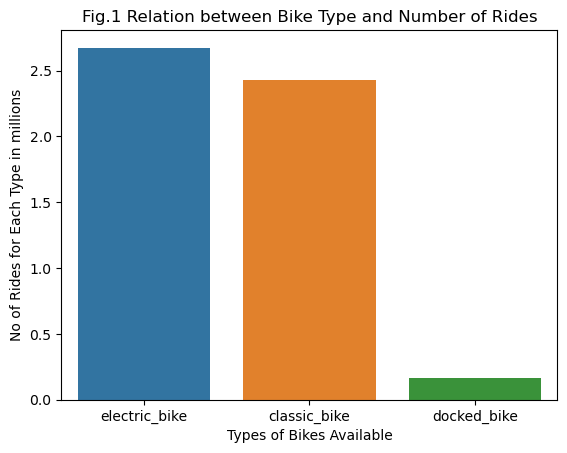

In [52]:
sns.barplot(x=merger['rideable_type'].unique(),
           y=merger['rideable_type'].value_counts()/1000000
           );
plt.xlabel('Types of Bikes Available');
plt.ylabel('No of Rides for Each Type in millions');
plt.title('Fig.1 Relation between Bike Type and Number of Rides');
plt.tick_params(axis='y',labelsize=10);

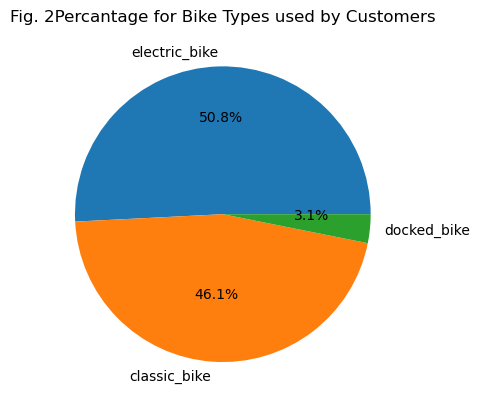

In [53]:
y=merger['rideable_type'].value_counts()
mlabels=merger['rideable_type'].unique()
def per(values):
    def form(pcntg):
        total=sum(values)
        val=int(round(pcntg*total/100.0))
        return '{:.1f}%\n'.format(pcntg,v=val)
    return form
plt.pie(y,labels=mlabels,autopct=per(y));
plt.title('Fig. 2Percantage for Bike Types used by Customers');

### Identify customers patterns:

In [54]:
#Count total trips done by user types
merger['member_casual'].value_counts()

member    3084894
casual    2181127
Name: member_casual, dtype: int64

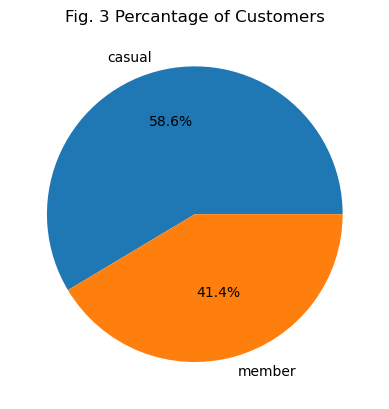

In [55]:
plt.pie(merger['member_casual'].value_counts(),
        labels=merger['member_casual'].unique(),
        autopct=per(merger['member_casual'].value_counts()));
plt.title('Fig. 3 Percantage of Customers');

### Identify weekdays pattern:

In [56]:
#Getting ride numbers in each day
merger['startday'].value_counts()

Saturday     853076
Thursday     774422
Wednesday    742662
Friday       742216
Sunday       729128
Tuesday      725234
Monday       699283
Name: startday, dtype: int64

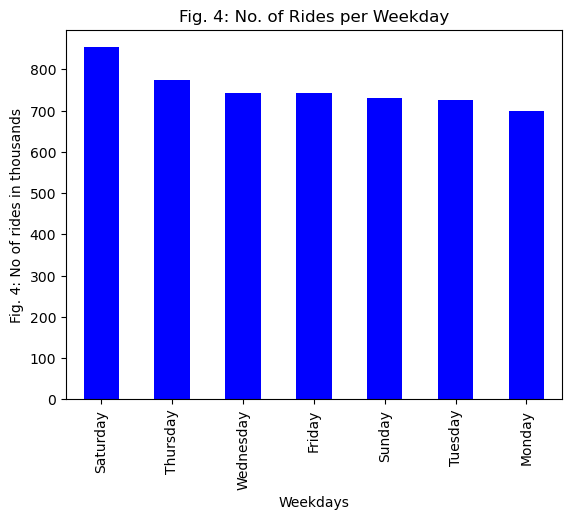

In [60]:
(merger['startday'].value_counts()/1000).plot(kind='bar',color='blue');
plt.title('Fig. 4: No. of Rides per Weekday');
plt.xlabel('Weekdays');
plt.ylabel('Fig. 4: No of rides in thousands');

### Identify months pattern:

In [ ]:
def day_mean(day):
    merger.loc[merger['startday']==day]

In [73]:
merger['month']=merger['startdate'].dt.month
merger['month_name'] = merger['startdate'].dt.month_name().str[:3]
merger.head()

,ride_id,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,...,startdate,starttime,enddate,endtime,startday,endday,duration,month,month_full,month_name
0,C2F7DD78E82EC875,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012800,-87.665906,42.012560,-87.674367,...,2022-01-13,0 days 11:59:47,2022-01-13,0 days 12:02:44,Thursday,Thursday,2.950000,1,January,Jan
1,A6CF8980A652D272,electric_bike,Glenwood Ave & Touhy Ave,525,Clark St & Touhy Ave,RP-007,42.012763,-87.665967,42.012560,-87.674367,...,2022-01-10,0 days 08:41:56,2022-01-10,0 days 08:46:17,Monday,Monday,4.350000,1,January,Jan
2,BD0F91DFF741C66D,classic_bike,Sheffield Ave & Fullerton Ave,TA1306000016,Greenview Ave & Fullerton Ave,TA1307000001,41.925602,-87.653708,41.925330,-87.665800,...,2022-01-25,0 days 04:53:40,2022-01-25,0 days 04:58:01,Tuesday,Tuesday,4.350000,1,January,Jan
3,CBB80ED419105406,classic_bike,Clark St & Bryn Mawr Ave,KA1504000151,Paulina St & Montrose Ave,TA1309000021,41.983593,-87.669154,41.961507,-87.671387,...,2022-01-04,0 days 00:18:04,2022-01-04,0 days 00:33:00,Tuesday,Tuesday,14.933333,1,January,Jan
4,DDC963BFDDA51EEA,classic_bike,Michigan Ave & Jackson Blvd,TA1309000002,State St & Randolph St,TA1305000029,41.877850,-87.624080,41.884621,-87.627834,...,2022-01-20,0 days 01:31:10,2022-01-20,0 days 01:37:12,Thursday,Thursday,6.033333,1,January,Jan


In [74]:
merger['month_name'].value_counts()

Jul    794349
Aug    757025
Jun    740529
Sep    673877
May    609064
Oct    535427
Apr    354490
Nov    322280
Mar    270665
Feb    109798
Jan     98517
Name: month_name, dtype: int64

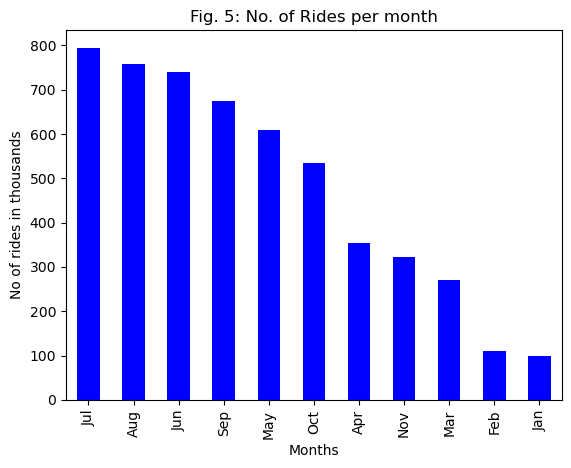

In [76]:
(merger['month_name'].value_counts()/1000).plot(kind='bar',color='blue');
plt.title('Fig. 5: No. of Rides per month');
plt.xlabel('Months');
plt.ylabel('No of rides in thousands');

#### Function to manually have pattern for each month

In [77]:
def month_mean(month):
    month_mean=merger.loc[merger['month']==month]
    month_mean_duration=month_mean['duration'].mean()
    rider_types=month_mean['member_casual'].value_counts()
    bike_type=month_mean['rideable_type'].value_counts()
    return month_mean_duration,rider_types,bike_type
month_entry=int(input('enter month'))
month_mean(month_entry)

enter month4


(14.861931366188093,
 member    234332
 casual    120158
 Name: member_casual, dtype: int64,
 electric_bike    183987
 classic_bike     159166
 docked_bike       11337
 Name: rideable_type, dtype: int64)

### Relation between weekdays and member type for weekdays:

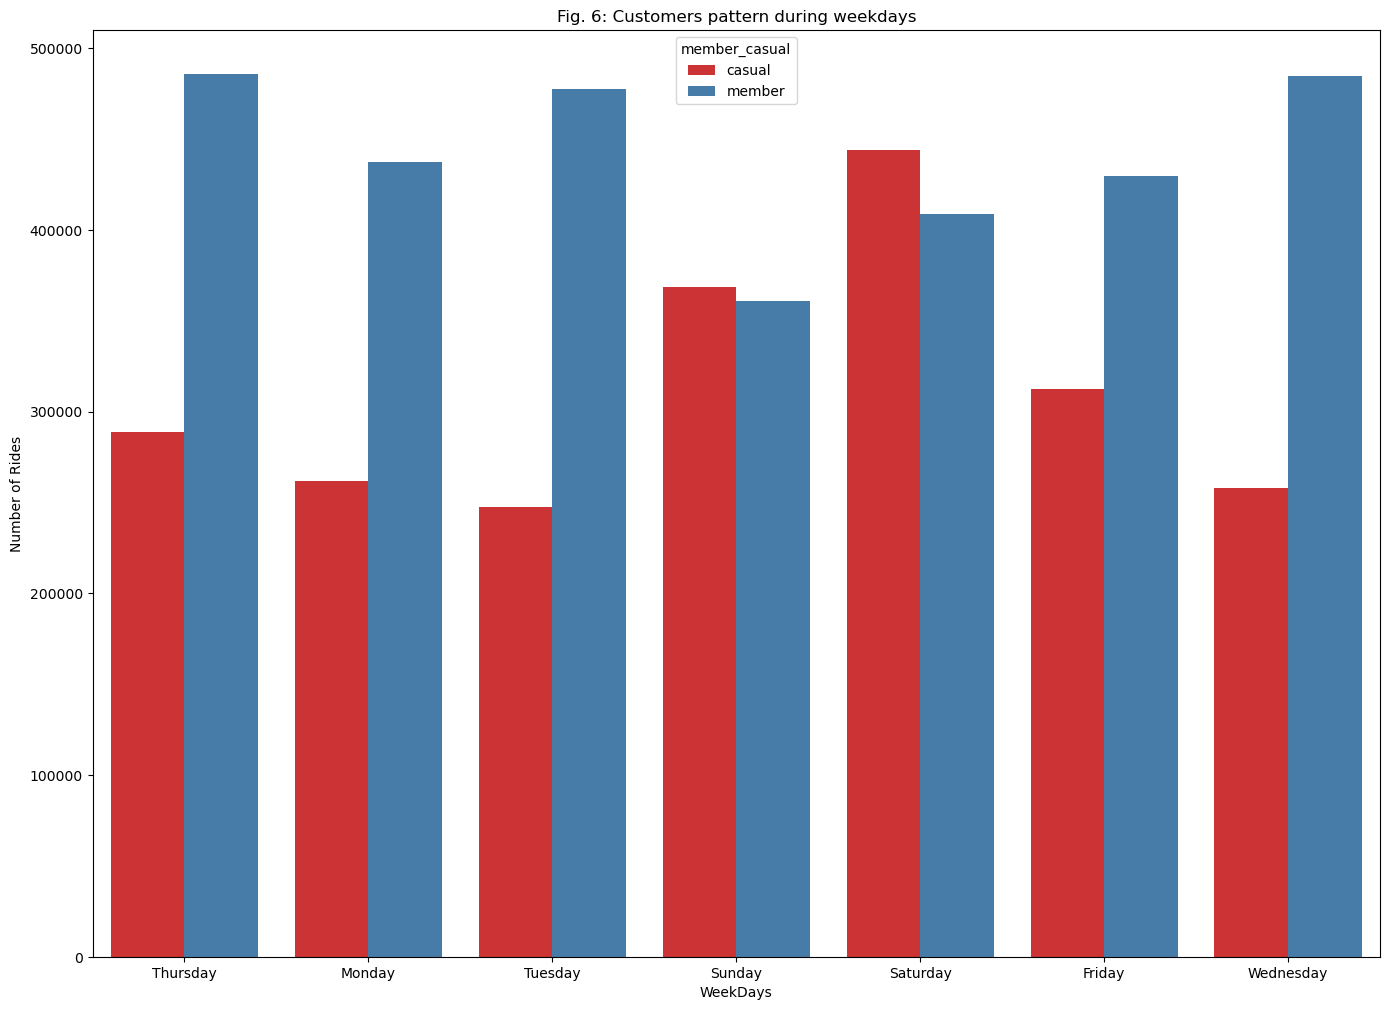

In [84]:
plt.figure(figsize=(14,10))
sns.countplot(x='startday', hue='member_casual', data=merger, palette='Set1')
plt.tight_layout()
plt.xlabel('WeekDays');
plt.ylabel('Number of Rides');
plt.title('Fig. 6: Customers pattern during weekdays');

### Relation between weekdays and member type for months:

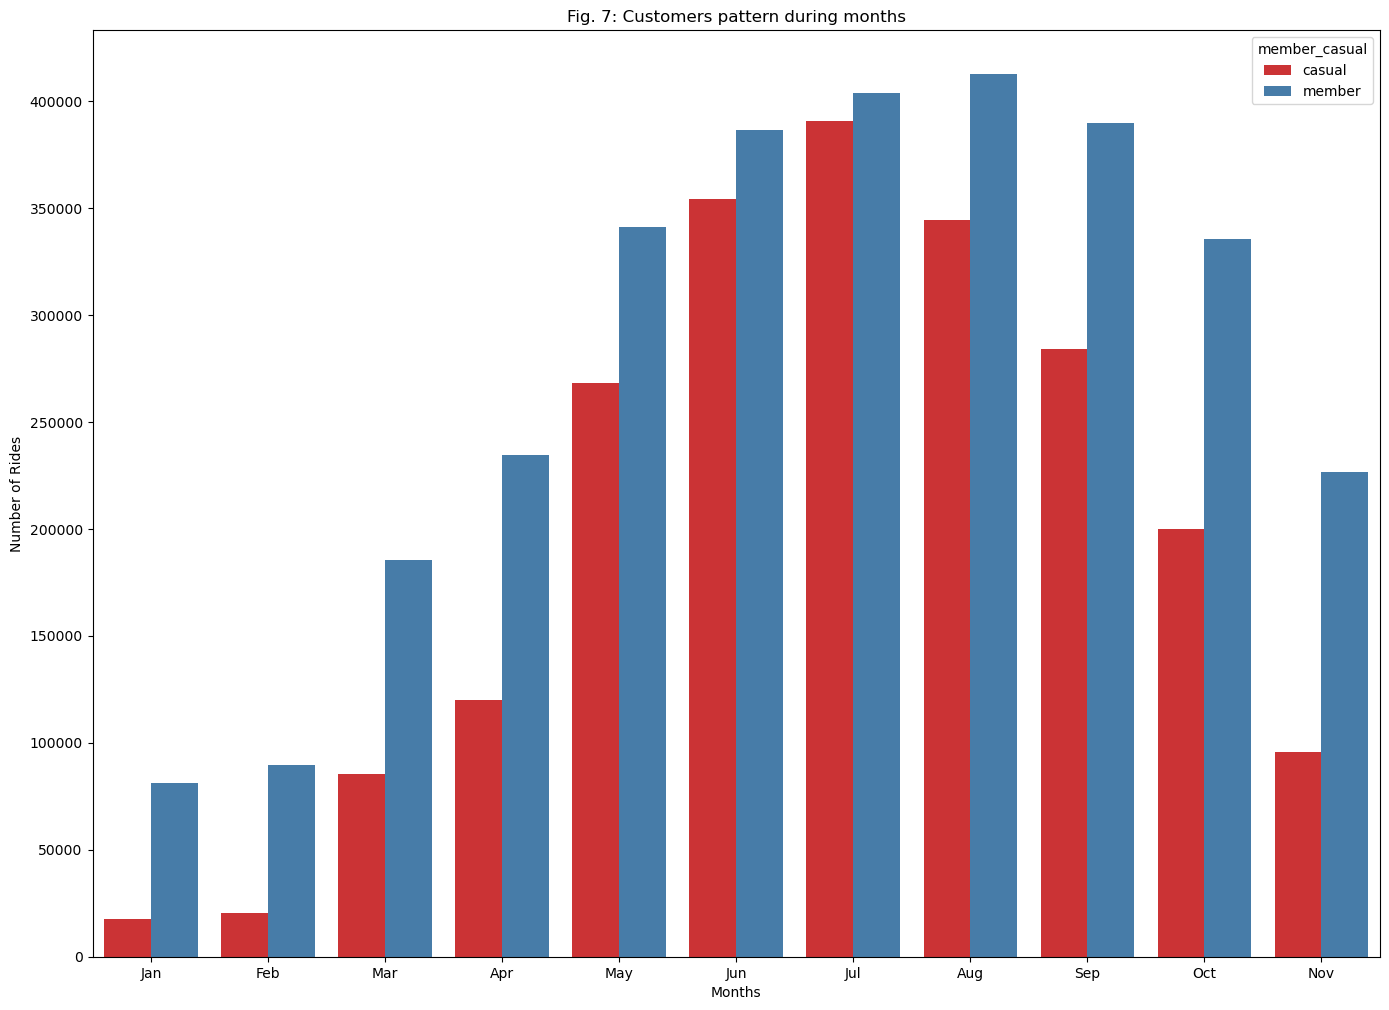

In [85]:
plt.figure(figsize=(14,10))
sns.countplot(x='month_name', hue='member_casual', data=merger, palette='Set1')
plt.tight_layout()
plt.xlabel('Months');
plt.ylabel('Number of Rides');
plt.title('Fig. 7: Customers pattern during months');

### Relation between weekdays and bike type for weekdays:

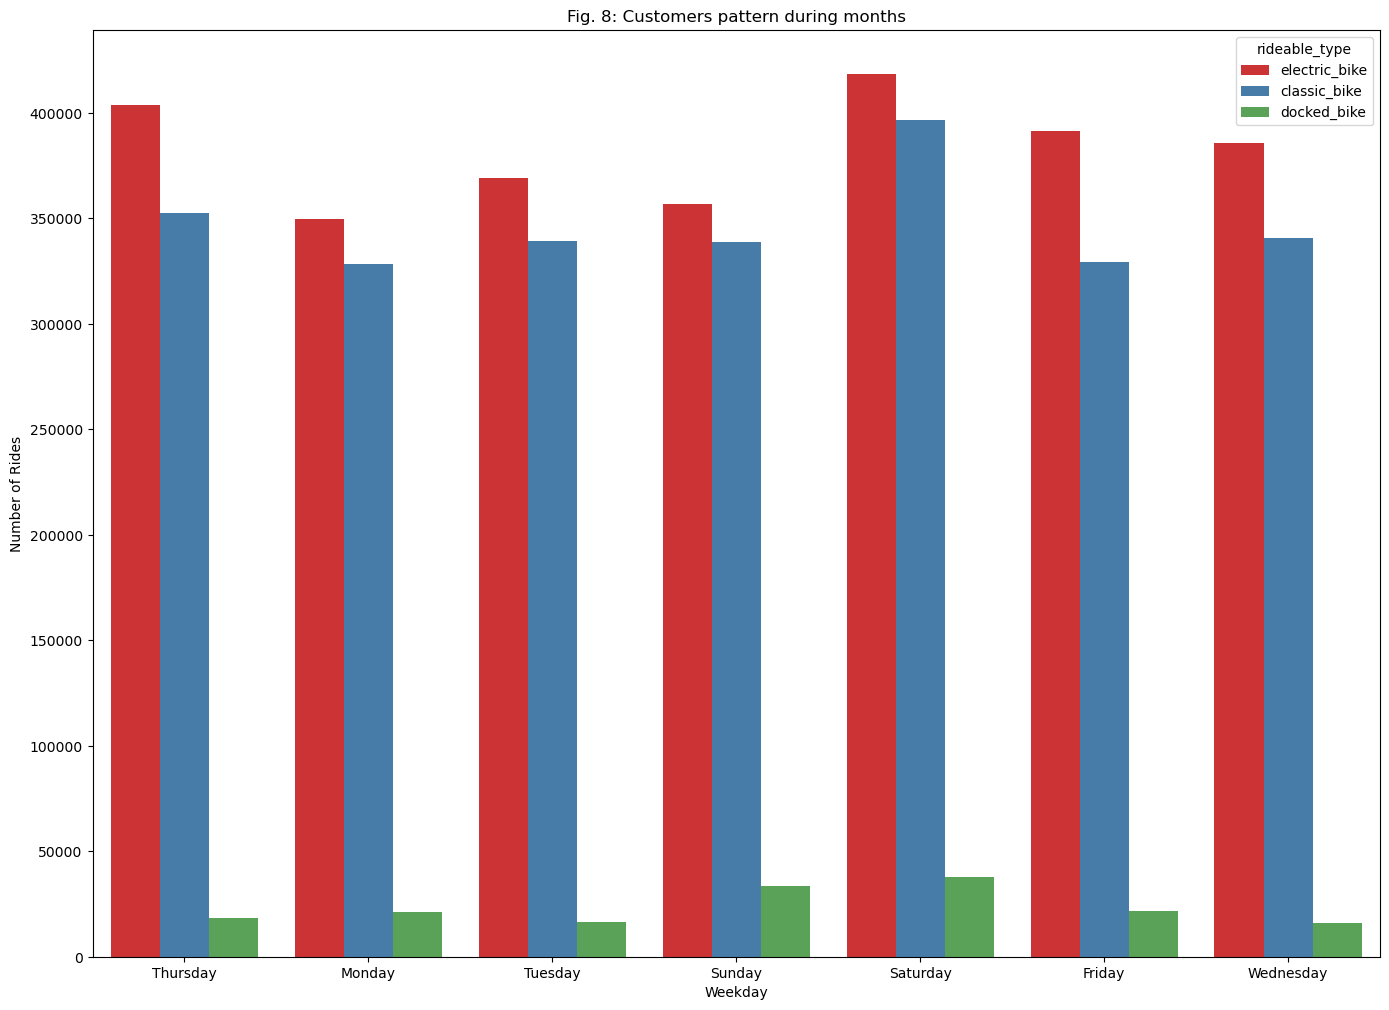

In [87]:
plt.figure(figsize=(14,10))
sns.countplot(x='startday', hue='rideable_type', data=merger, palette='Set1')
plt.tight_layout()
plt.xlabel('Weekday');
plt.ylabel('Number of Rides');
plt.title('Fig. 8: Customers pattern during months');

### Relation between weekdays and bike type for months:

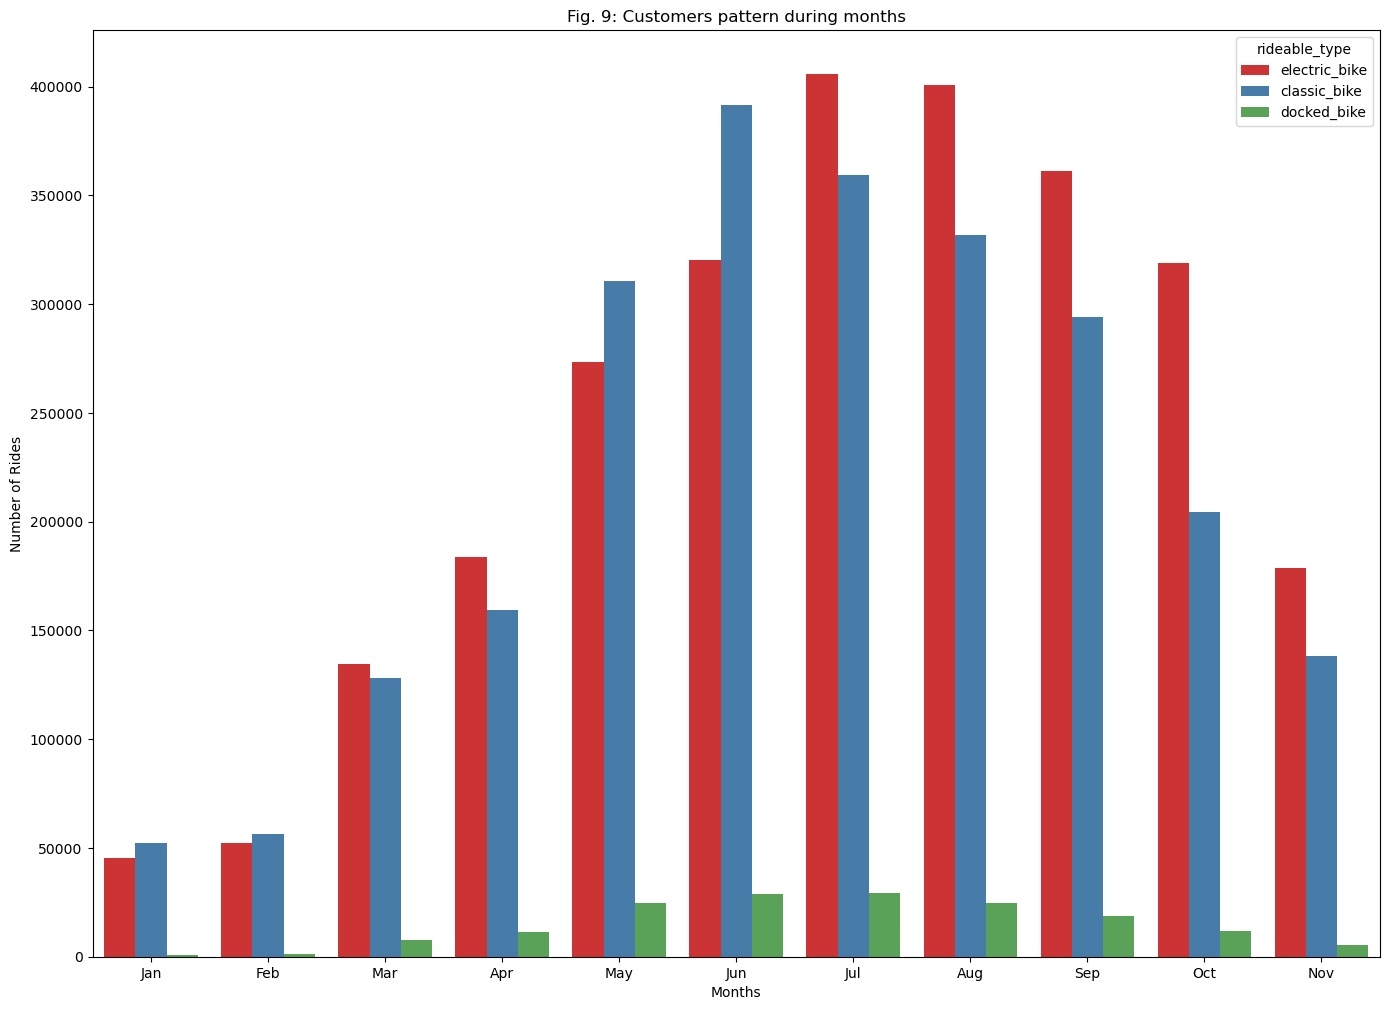

In [88]:
plt.figure(figsize=(14,10))
sns.countplot(x='month_name', hue='rideable_type', data=merger, palette='Set1')
plt.tight_layout()
plt.xlabel('Months');
plt.ylabel('Number of Rides');
plt.title('Fig. 9: Customers pattern during months');

## Findings:

From the analysis performed it shows some patterns that is obviously noticed:
1. Maximum duration time and data shows our service in bike sharing can be used all day not for a specific trip.
2. Minimum duration time and data shows that some customers tend to leave the bike once they have it.
3. Most preferred bike type is electric then usual bike. While docked type has only 3.1% of total market.
4. Casual members have more attribution than subscribed members.
5. Saturday is the most used day.
6. Summer is most preferable season in our business and for our customers as well.

## Conclusion:

Our next campaign can look deeper and enchance based on the following ideas:
1. Take in consideration full day rental service supported by current global direction to minimize emissions.
2. Best campaign is set to launch in May as summer months are our top months.
3. Invest more in electric bikes as it seems that everyone loving it based on the data above.
4. Try to close the docked bikes branch as it doesn't have impact on total rides in both months and weekdays.
